# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags

## Data Importing

In [2]:
# Locate files
data_dir = "../data"
files = os.listdir(data_dir)
json_files = [f for f in files if f.endswith(".json")]


In [3]:
# Load one file to see what a single sale looks like
with open(os.path.join(data_dir, json_files[0])) as f:
    sample = json.load(f)
first_sale = sample["data"]["results"][0]
pprint(first_sale)
print("Keys in one sale record:", list(first_sale.keys()))


{'branding': [{'name': 'Howard Hanna - Colonial Park',
               'photo': None,
               'type': 'Office'}],
 'community': None,
 'description': {'baths': 2,
                 'baths_1qtr': None,
                 'baths_3qtr': None,
                 'baths_full': 2,
                 'baths_half': None,
                 'beds': 3,
                 'garage': 2,
                 'lot_sqft': 22651,
                 'name': None,
                 'sold_date': '2024-01-16',
                 'sold_price': 345000,
                 'sqft': 1539,
                 'stories': 1,
                 'sub_type': None,
                 'type': 'single_family',
                 'year_built': 2001},
 'flags': {'is_coming_soon': None,
           'is_contingent': None,
           'is_for_rent': None,
           'is_foreclosure': None,
           'is_new_construction': None,
           'is_new_listing': False,
           'is_pending': None,
           'is_plan': None,
           'is_price_reduced':

In [4]:
# Loop through every JSON, collect all sales into a list
all_sales = []
for file in json_files:
    with open(os.path.join(data_dir, file)) as f:
        data = json.load(f)
        all_sales.extend(data["data"]["results"])

In [5]:
# Flatten into a DataFrame
df = pd.json_normalize(all_sales)
print("\nInitial DataFrame shape:", df.shape)


Initial DataFrame shape: (8159, 67)


## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [34]:
# Initial overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      float64
 11  virt

In [35]:
df.describe(include="all")

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location.county.fips_code,location.county.name,primary_photo,source,products,other_listings,location.address.coordinate,community.advertisers,community.description.name,location.county
count,8125,7638,8159,8159,7752,0,8159,7.721000e+03,8159,7403,...,7588,8149,0.0,0.0,0.0,0.0,0.0,5,5,0.0
unique,1716,1628,1795,1,1636,0,996,NaN,1795,1627,...,65,68,NaN,NaN,NaN,NaN,NaN,1,1,NaN
top,2023-10-20,[big_lot],12312-Birchfalls-Dr_Raleigh_NC_27614_M60077-26455,sold,2024-01-05T17:38:27.000000Z,NaN,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,6007726455,"[{'tags': [{'label': 'unknown', 'probability':...",...,42043,Franklin,NaN,NaN,NaN,NaN,NaN,[{'office': {'hours': 'Monday - Saturday 10:00...,Woods of Copper Creek,NaN
freq,95,62,5,8159,80,NaN,434,NaN,5,5,...,210,404,NaN,NaN,NaN,NaN,NaN,5,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.341582e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.514925e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.090000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.250000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Detect nested/list columns
nested = []
for col in df.columns:
    non_null = df[col].dropna()
    if non_null.empty:
        continue      # skip columns that are all NaN
    sample_val = non_null.iloc[0]
    if isinstance(sample_val, (list, dict)):
        nested.append(col)

print("Nested columns:", nested)



Nested columns: ['tags', 'branding', 'photos', 'virtual_tours', 'source.agents', 'other_listings.rdc', 'community.advertisers']


In [6]:
# Drop rows missing our target (sold_price)
df = df.dropna(subset=["description.sold_price"])
print("\nAfter dropping missing sold_price:", df.shape)


After dropping missing sold_price: (6716, 67)


In [7]:

# Drop rows missing location coordinates
df = df.dropna(subset=["location.address.coordinate.lon",
                       "location.address.coordinate.lat"])
print("After dropping missing coords:", df.shape)

After dropping missing coords: (7909, 67)


In [8]:
# Impute obvious nulls

#    - No garage → 0
df["description.garage"] = df["description.garage"].fillna(0)
#    - Missing beds → median beds
df["description.beds"] = df["description.beds"].fillna(df["description.beds"].median())
#    - No full baths → 0
df["description.baths_full"] = df["description.baths_full"].fillna(0)

#    - sqft, lot_sqft → median values
for col in ["description.sqft", "description.lot_sqft"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [9]:
# Convert date strings to datetime
for c in ["list_date", "last_update_date", "description.sold_date"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

In [10]:
#  Inspected null counts & decided which columns to drop
null_counts = df.isna().sum().sort_values(ascending=False)
print("Top null counts:\n", null_counts.head(15))

Top null counts:
 location.county                7909
community                      7909
description.name               7909
flags.is_new_construction      7909
flags.is_for_rent              7909
flags.is_subdivision           7909
flags.is_contingent            7909
flags.is_pending               7909
flags.is_coming_soon           7909
flags.is_plan                  7909
primary_photo                  7909
products                       7909
location.address.coordinate    7909
open_houses                    7909
other_listings                 7909
dtype: int64


In [11]:
# Dropped super-sparse columns (>50% null)
threshold = 0.5 * len(df)
cols_to_drop = [col for col, n in null_counts.items() if n > threshold]
print("Dropping columns with >50% missing:", cols_to_drop)
df = df.drop(columns=cols_to_drop)
print("After dropping sparse cols:", df.shape)

Dropping columns with >50% missing: ['location.county', 'community', 'description.name', 'flags.is_new_construction', 'flags.is_for_rent', 'flags.is_subdivision', 'flags.is_contingent', 'flags.is_pending', 'flags.is_coming_soon', 'flags.is_plan', 'primary_photo', 'products', 'location.address.coordinate', 'open_houses', 'other_listings', 'description.baths_1qtr', 'source', 'source.plan_id', 'source.spec_id', 'community.advertisers', 'community.description.name', 'flags.is_foreclosure', 'description.baths_3qtr', 'virtual_tours', 'description.sub_type', 'description.baths_half', 'price_reduced_amount', 'flags.is_price_reduced']
After dropping sparse cols: (7909, 39)


In [12]:
# Dropped nested or leak-prone columns
nested_or_leaky = [
    "branding", "photos", "virtual_tours",
    "source.agents", "other_listings.rdc",
    "community.advertisers", "community.description.name"
]
df = df.drop(columns=[c for c in nested_or_leaky if c in df.columns])
print("After dropping nested/leaky cols:", df.shape)  # should still be (6537, 39)


After dropping nested/leaky cols: (7909, 35)


### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [ ]:
def encode_tags(df):
    all_tags = set()
    df['tags'].dropna().apply(all_tags.update)

    for tag in sorted(all_tags):
        df[f"tag__{tag}"] = df['tags'].apply(
            lambda lst: 1 if isinstance(lst, list) and tag in lst else 0
        )
    return df



In [ ]:

from functions_variables import encode_tags

all_tags = set()
df["tags"].dropna().apply(all_tags.update)
n_tags   = len(all_tags)
n_cities = df["location.address.city"].nunique()
n_states = df["location.address.state"].nunique()
print(f"If we OHE all tags + city + state → "
      f"{n_tags} tags + {n_cities} cities + {n_states} states "
      f"= {n_tags + n_cities + n_states} total dummies")

df = encode_tags(df)

# dropped the original list-of-tags column
df.drop(columns=["tags"], inplace=True, errors="ignore")
print("After encode_tags, shape:", df.shape)

# pruned any very infrequent tags (<1% of homes)
tag_cols  = [c for c in df.columns if c.startswith("tag__")]
threshold = 0.01 * len(df)
rare      = [c for c in tag_cols if df[c].sum() < threshold]
df.drop(columns=rare, inplace=True)
print(f"Dropped {len(rare)}/{n_tags} rare tag columns → new shape: {df.shape}")


If we OHE all tags + city + state → 155 tags + 98 cities + 45 states = 298 total dummies
After encode_tags, shape: (7909, 34)
Dropped 0/155 rare tag columns → new shape: (7909, 34)


### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [ ]:

from sklearn.model_selection import train_test_split
import pandas as pd

# split into train/test BEFORE computing any averages
X = df.drop(columns=["description.sold_price"])
y = df["description.sold_price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# compute city‐ and state‐mean prices on TRAIN only
train_full  = pd.concat([X_train, y_train], axis=1)

city_means = (
    train_full
      .groupby("location.address.city")["description.sold_price"]
      .mean()
      .rename("city_mean_price")
)

state_means = (
    train_full
      .groupby("location.address.state")["description.sold_price"]
      .mean()
      .rename("state_mean_price")
)

global_mean = y_train.mean()

# mapped those means back to TRAIN & TEST, filling unseen with global mean
for split in (X_train, X_test):
    split["city_mean_price"]  = (
        split["location.address.city"]
           .map(city_means)
           .fillna(global_mean)
    )
    split["state_mean_price"] = (
        split["location.address.state"]
           .map(state_means)
           .fillna(global_mean)
    )

# dropped raw city/state now that you have their target‐encodings
X_train.drop(columns=["location.address.city","location.address.state"], inplace=True)
X_test .drop(columns=["location.address.city","location.address.state"], inplace=True)

print("After target‐encoding, shapes:")
print("  X_train:", X_train.shape)
print("  X_test: ", X_test.shape)


After target‐encoding, shapes:
  X_train: (6327, 33)
  X_test:  (1582, 33)


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [48]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [49]:
# perform EDA here

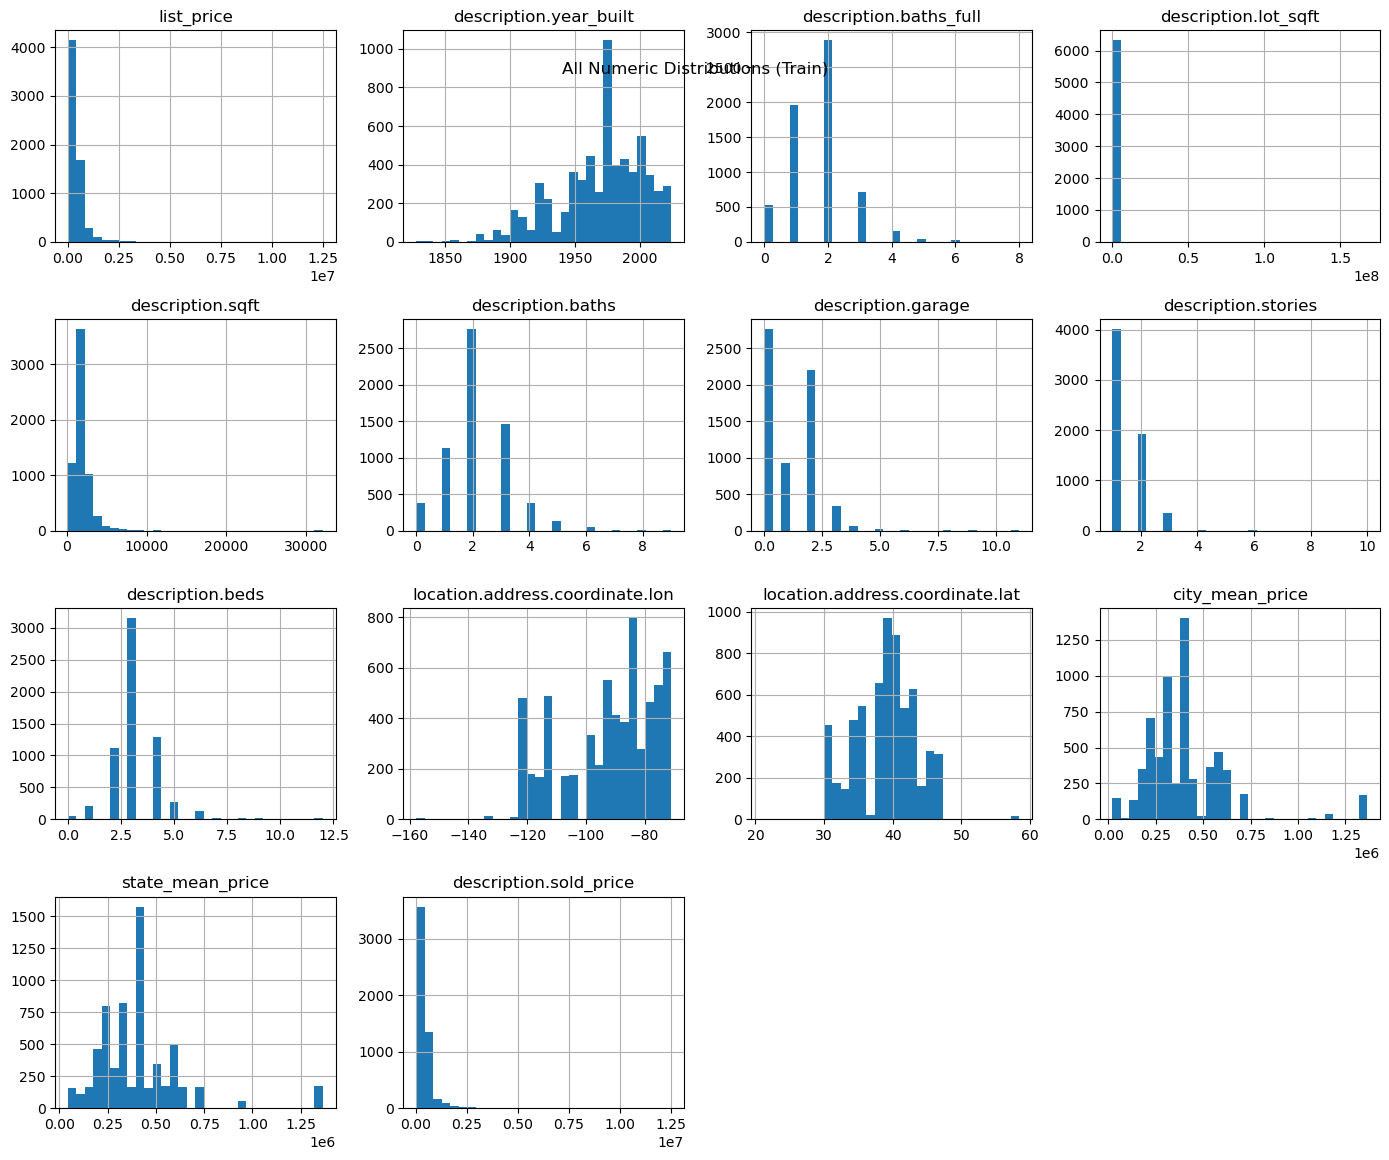

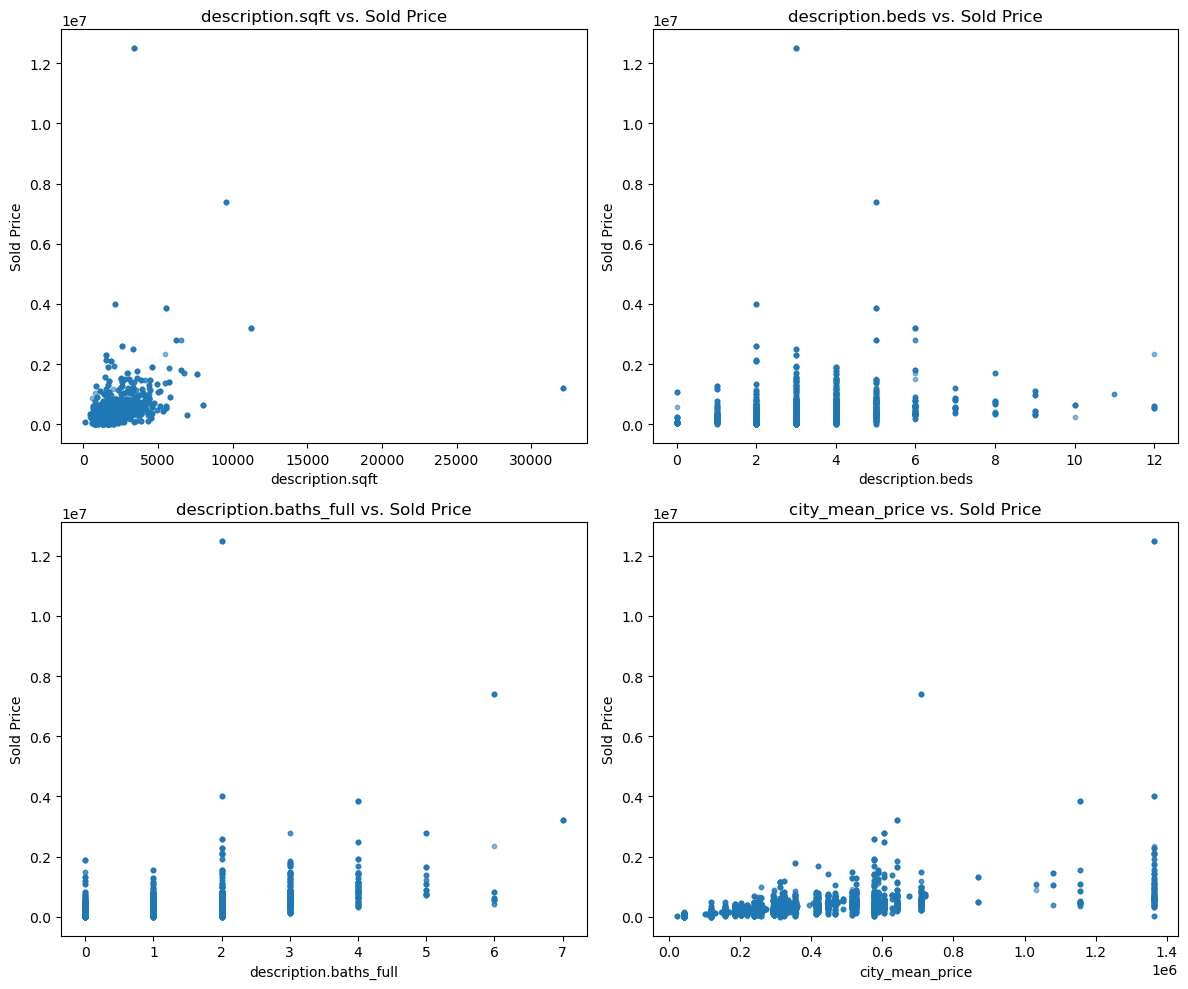

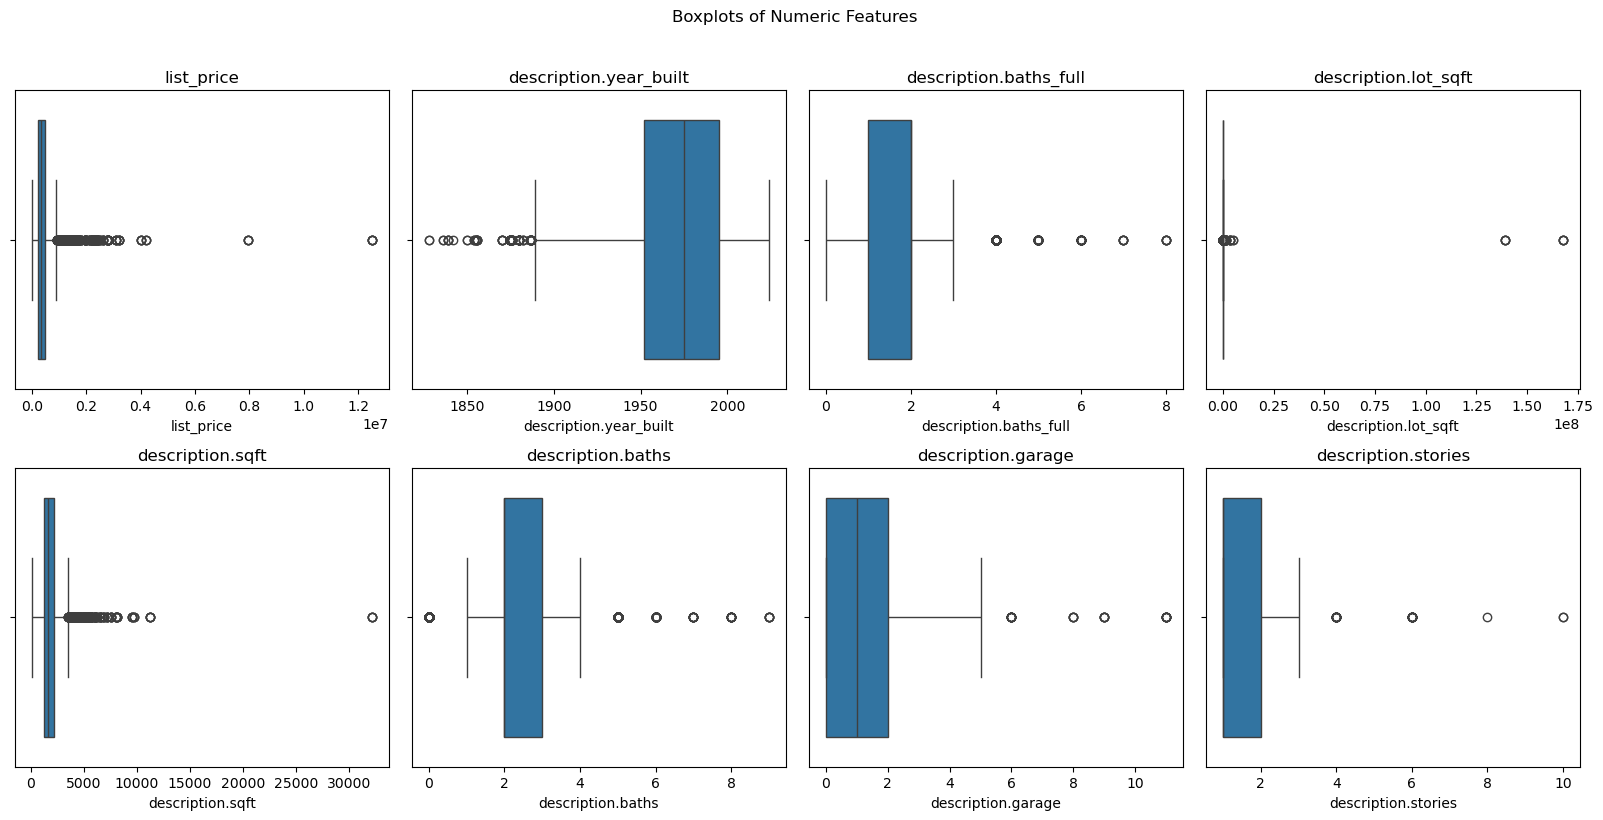

Top 10 feature pairs by absolute correlation:
                  var1                   var2     corr
       city_mean_price       state_mean_price 0.970045
            list_price description.sold_price 0.968877
description.baths_full      description.baths 0.808804
      description.sqft      description.baths 0.543880
description.baths_full       description.beds 0.522558
     description.baths       description.beds 0.517274
      description.sqft       description.beds 0.478017
       city_mean_price description.sold_price 0.452621
            list_price       description.sqft 0.447046
      state_mean_price description.sold_price 0.439034


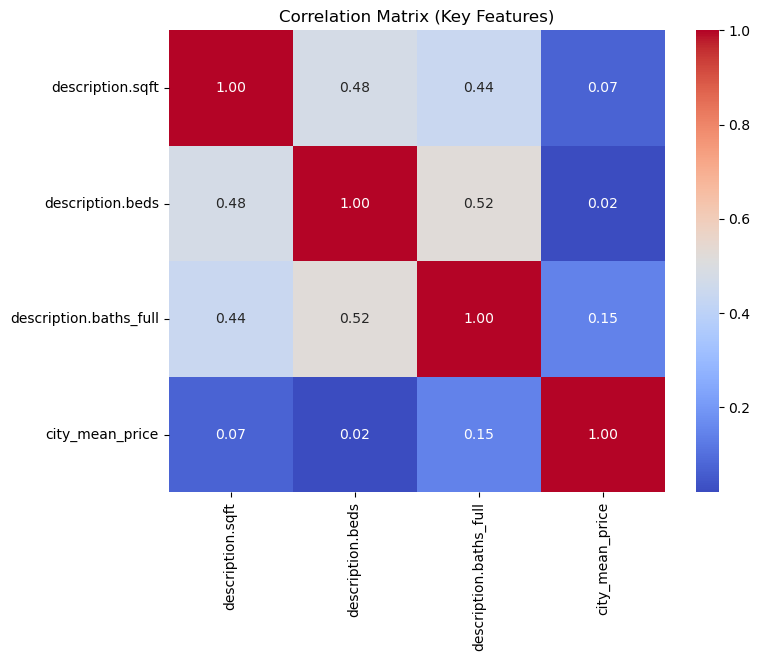

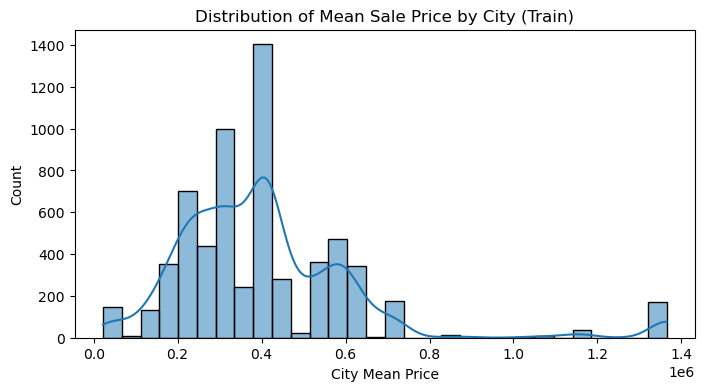

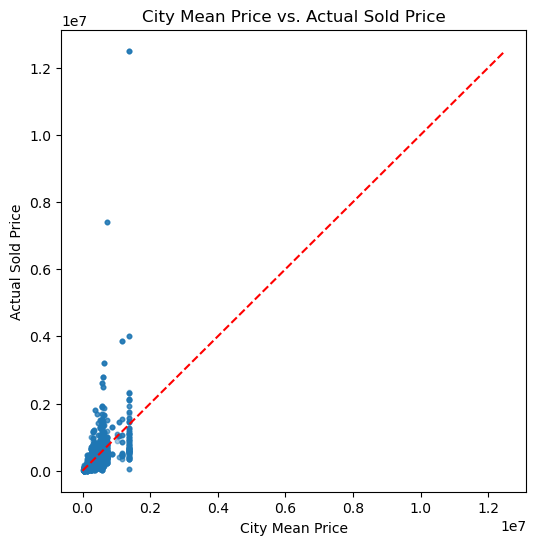

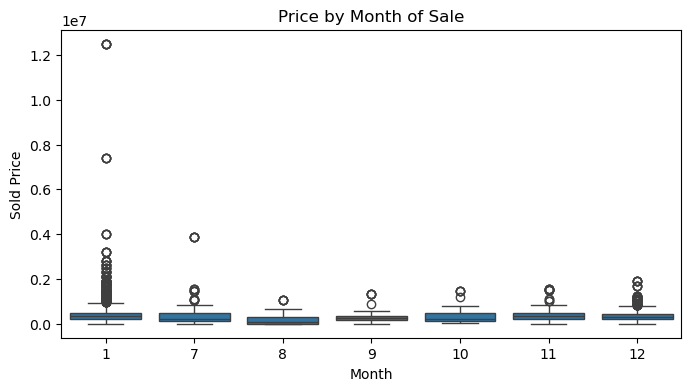

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# temporary EDA DataFrame from X_train + y_train
eda_df = X_train.copy()
eda_df["description.sold_price"] = y_train

# ensured sold_date is datetime
eda_df["description.sold_date"] = pd.to_datetime(eda_df["description.sold_date"])

# listed he numeric columns to explore
num_cols = eda_df.select_dtypes(include=[np.number]).columns.tolist()

# plotted all numeric distributions
eda_df[num_cols].hist(bins=30, figsize=(14,12))
plt.suptitle("All Numeric Distributions (Train)", y=0.92)
plt.tight_layout()
plt.show()

# scatterplots vs. sold price
plot_feats = ["description.sqft", "description.beds",
              "description.baths_full", "city_mean_price"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, feat in zip(axes.flatten(), plot_feats):
    ax.scatter(eda_df[feat], eda_df["description.sold_price"],
               alpha=0.5, s=10)
    ax.set_xlabel(feat)
    ax.set_ylabel("Sold Price")
    ax.set_title(f"{feat} vs. Sold Price")
plt.tight_layout()
plt.show()

# boxplots to catch extreme outliers (first 8 numeric cols)
boxplot_feats = num_cols[:8]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax, col in zip(axes.flatten(), boxplot_feats):
    sns.boxplot(x=eda_df[col], ax=ax)
    ax.set_title(col)
plt.suptitle("Boxplots of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

# correlation matrix & top pairs
corr = eda_df[num_cols].corr().abs()
pairs = (
    corr.unstack()
        .reset_index(name="corr")
        .query("level_0 != level_1")
        .drop_duplicates(subset=["corr"])
        .sort_values("corr", ascending=False)
        .head(10)
)
pairs.columns = ["var1", "var2", "corr"]
print("Top 10 feature pairs by absolute correlation:")
print(pairs.to_string(index=False))

#  heatmap of key features
plt.figure(figsize=(8, 6))
sns.heatmap(corr.loc[plot_feats, plot_feats], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Key Features)")
plt.show()

# city mean price distribution
plt.figure(figsize=(8,4))
sns.histplot(eda_df["city_mean_price"], bins=30, kde=True)
plt.title("Distribution of Mean Sale Price by City (Train)")
plt.xlabel("City Mean Price")
plt.ylabel("Count")
plt.show()

# city mean vs. actual sold price
plt.figure(figsize=(6,6))
plt.scatter(eda_df["city_mean_price"], eda_df["description.sold_price"],
            alpha=0.4, s=10)
maxv = eda_df["description.sold_price"].max()
plt.plot([0, maxv], [0, maxv], 'r--')
plt.title("City Mean Price vs. Actual Sold Price")
plt.xlabel("City Mean Price")
plt.ylabel("Actual Sold Price")
plt.show()

# seasonality: price by sale‐month
eda_df["month"] = eda_df["description.sold_date"].dt.month
plt.figure(figsize=(8,4))
sns.boxplot(x="month", y="description.sold_price", data=eda_df)
plt.title("Price by Month of Sale")
plt.xlabel("Month")
plt.ylabel("Sold Price")
plt.show()


## What we learned & next steps

**Seasonality**  
- Sales show a clear monthly pattern: January has the highest outliers and prices shift over the year.  
- **Next:** Add a “month of sale” feature (or simple seasonal dummy) to capture this effect.

**Outliers & Skew**  
- Variables like **sold_price**, **sqft**, **lot_sqft**, **baths_full** and **city_mean_price** are heavily right-skewed with extreme outliers.  
- **Next:** Apply a log (or log1p) transform to these features and consider capping the most extreme values.

**Feature Correlations & Redundancy**  
- **Beds vs. Baths:** correlation ≈ 0.53 → merge into a single `total_rooms` feature (or drop one).  
- **City vs. State Mean Price:** correlation ≈ 0.97 → drop `state_mean_price`, keep only `city_mean_price`.

**Geographic Signal**  
- **City mean price** alone explains ~47 % of price variance without overfitting.  
- Confirms our target-encoding approach keeps strong location information without dozens of dummies.

---

### Action Plan
1. **Create** a “month of sale” feature to model seasonality.  
2. **Log-transform** skewed features (`sold_price`, `sqft`, `lot_sqft`, `city_mean_price`).  
3. **Combine or drop** redundant features:  
   - Build `total_rooms = beds + baths_full`  
   - Remove `state_mean_price`  
4. **Fit** a baseline **Linear Regression** on the log-transformed target and evaluate with RMSE.  (One possibility)
5. **Compare** performance to a **tree-based** model (e.g. Random Forest) to capture any non-linear relationships. (Potentially) 


## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [23]:

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# make sure the folder exists
os.makedirs("../processed", exist_ok=True)

# the numeric columns to scale
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

joblib.dump(scaler, "../processed/scaler.pkl")

# save features (no index since index=False)
X_train_scaled.to_csv("../processed/X_train_scaled.csv", index=False)
X_test_scaled .to_csv("../processed/X_test_scaled.csv",  index=False)

# save targets (single‐column, no header)
y_train.to_csv("../processed/y_train.csv", index=False, header=False)
y_test .to_csv("../processed/y_test.csv",  index=False, header=False)

print("scaled splits saved to ../processed/")


scaled splits saved to ../processed/
